### Importing useful libraries and functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

from sklearn.tree import export_text
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

### Loading and exploring the raw dataset

In [2]:
dataset_og = pd.read_csv("Internet Firewall Data.csv")
dataset_og

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,314,192,122,6,15,4,2,allow
65528,50964,80,13485,80,4680740,67312,4613428,4675,77,985,3690,allow
65529,54871,445,0,0,70,70,0,1,0,1,0,drop
65530,54870,445,0,0,70,70,0,1,0,1,0,drop


In [3]:
print (type(dataset_og))
print (dataset_og.shape)
dataset_og

<class 'pandas.core.frame.DataFrame'>
(65532, 12)


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,314,192,122,6,15,4,2,allow
65528,50964,80,13485,80,4680740,67312,4613428,4675,77,985,3690,allow
65529,54871,445,0,0,70,70,0,1,0,1,0,drop
65530,54870,445,0,0,70,70,0,1,0,1,0,drop


In [4]:
print ("Number of unique classes: ")
print (len(list(dataset_og.Action.unique())))
print()

print ("Classes: ")
classes = list(dataset_og.Action.unique())
print (classes)

Number of unique classes: 
4

Classes: 
['allow', 'drop', 'deny', 'reset-both']


### Pre-processing begins

In [5]:
#Retaining only the top 4 features as obtained from the Feature Analysis

dataset_significant = dataset_og[['Destination Port', 'NAT Source Port', 'Elapsed Time (sec)', 'pkts_received', 'Action']]
dataset_significant

,Destination Port,NAT Source Port,Elapsed Time (sec),pkts_received,Action
0,53,54587,30,1,allow
1,3389,56258,17,9,allow
2,50321,43265,1199,1,allow
3,3389,50553,17,7,allow
4,443,45848,16,18,allow
...,...,...,...,...,...
65527,80,13237,15,2,allow
65528,80,13485,77,3690,allow
65529,445,0,0,0,drop
65530,445,0,0,0,drop


In [6]:
#One-hot encoding the labels

dataset_encoded = pd.get_dummies(dataset_significant, columns=["Action"])    #Not removing the duplicates
dataset_encoded

,Destination Port,NAT Source Port,Elapsed Time (sec),pkts_received,Action_allow,Action_deny,Action_drop,Action_reset-both
0,53,54587,30,1,1,0,0,0
1,3389,56258,17,9,1,0,0,0
2,50321,43265,1199,1,1,0,0,0
3,3389,50553,17,7,1,0,0,0
4,443,45848,16,18,1,0,0,0
...,...,...,...,...,...,...,...,...
65527,80,13237,15,2,1,0,0,0
65528,80,13485,77,3690,1,0,0,0
65529,445,0,0,0,0,0,1,0
65530,445,0,0,0,0,0,1,0


In [7]:
#Scaling the data

columns_to_scale = dataset_encoded.iloc[:, 0:4]

scaler = MinMaxScaler()
scaled_columns = scaler.fit_transform(columns_to_scale)

dataset_scaled = dataset_encoded
dataset_scaled.iloc[:, 0:4] = scaled_columns

dataset_scaled

,Destination Port,NAT Source Port,Elapsed Time (sec),pkts_received,Action_allow,Action_deny,Action_drop,Action_reset-both
0,0.000809,0.832944,0.002772,0.000003,1,0,0,0
1,0.051713,0.858442,0.001571,0.000028,1,0,0,0
2,0.767849,0.660182,0.110772,0.000003,1,0,0,0
3,0.051713,0.771389,0.001571,0.000021,1,0,0,0
4,0.006760,0.699596,0.001478,0.000055,1,0,0,0
...,...,...,...,...,...,...,...,...
65527,0.001221,0.201984,0.001386,0.000006,1,0,0,0
65528,0.001221,0.205768,0.007114,0.011277,1,0,0,0
65529,0.006790,0.000000,0.000000,0.000000,0,0,1,0
65530,0.006790,0.000000,0.000000,0.000000,0,0,1,0


### Arranging the data for the model

In [8]:
#Formally defining the input and output variables

x = dataset_scaled.drop(columns=['Action_allow', 'Action_deny', 'Action_drop', 'Action_reset-both'], axis=1)
y = dataset_scaled[['Action_allow', 'Action_deny', 'Action_drop', 'Action_reset-both']]
x, y

(       Destination Port  NAT Source Port  Elapsed Time (sec)  pkts_received
 0              0.000809         0.832944            0.002772       0.000003
 1              0.051713         0.858442            0.001571       0.000028
 2              0.767849         0.660182            0.110772       0.000003
 3              0.051713         0.771389            0.001571       0.000021
 4              0.006760         0.699596            0.001478       0.000055
 ...                 ...              ...                 ...            ...
 65527          0.001221         0.201984            0.001386       0.000006
 65528          0.001221         0.205768            0.007114       0.011277
 65529          0.006790         0.000000            0.000000       0.000000
 65530          0.006790         0.000000            0.000000       0.000000
 65531          0.006790         0.000000            0.000000       0.000000
 
 [65532 rows x 4 columns],
        Action_allow  Action_deny  Action_drop 

In [9]:
# Splitting the data intro training and testing components

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((52425, 4), (13107, 4), (52425, 4), (13107, 4))

### Working with the Random Forest Classifier

In [10]:
#Training 

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=10, n_estimators=100, oob_score=True)
classifier_rf.fit(x_train, y_train)

classifier_rf.oob_score_

0.998206962327134

In [11]:
#Testing 

y_pred = classifier_rf.predict(x_test)
print (y_pred.shape)
y_pred

(13107, 4)


array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0]], dtype=uint8)

### Model Evaluation

In [12]:
#Accuracy

correct_count = 0
incorrect_count = 0
for i in range(len(np.array(y_test))):
    if np.array_equal(np.array(y_test)[i], y_pred[i]):
        correct_count += 1
    else: 
        incorrect_count += 1
        
print (correct_count, incorrect_count, correct_count + incorrect_count)
accuracy = correct_count*100/(correct_count + incorrect_count)
print ("Accuracy: ")
print (accuracy)

13092 15 13107
Accuracy: 
99.88555733577478


In [13]:
#Obtaining a report containing other metrics (Precision, Recall, f1 Score)

report = classification_report(y_test, y_pred)

print ("Classification Report: ")
print (report)

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7545
           1       1.00      1.00      1.00      2994
           2       1.00      1.00      1.00      2562
           3       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00     13107
   macro avg       1.00      1.00      1.00     13107
weighted avg       1.00      1.00      1.00     13107
 samples avg       1.00      1.00      1.00     13107



### Result Visualization

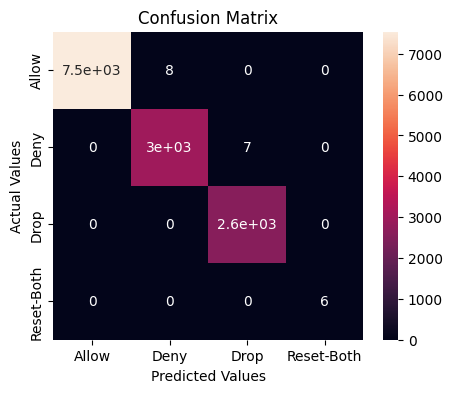

In [14]:
#Transforming the data to visualize confusion matrix
y_test_transformed = np.argmax(np.array(y_test), axis=1)
y_pred_transformed = np.argmax(np.array(y_pred), axis=1)

#Confusion Matrix
cm = confusion_matrix(y_test_transformed, y_pred_transformed)
cm_df = pd.DataFrame(cm, index = ['Allow', 'Deny', 'Drop', 'Reset-Both'], columns = ['Allow', 'Deny', 'Drop', 'Reset-Both'])

plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Model Visualization

In [15]:
print (export_text(classifier_rf.estimators_[0], spacing=3, decimals=2, 
                  feature_names = list(dataset_scaled.columns)[0:4]))

|--- NAT Source Port <= 0.00
|   |--- Destination Port <= 0.01
|   |   |--- Destination Port <= 0.01
|   |   |   |--- pkts_received <= 0.00
|   |   |   |   |--- Elapsed Time (sec) <= 0.00
|   |   |   |   |   |--- Destination Port <= 0.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Destination Port >  0.00
|   |   |   |   |   |   |--- Destination Port <= 0.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Destination Port >  0.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Elapsed Time (sec) >  0.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- pkts_received >  0.00
|   |   |   |   |--- class: 1
|   |   |--- Destination Port >  0.01
|   |   |   |--- class: 0
|   |--- Destination Port >  0.01
|   |   |--- pkts_received <= 0.00
|   |   |   |--- Elapsed Time (sec) <= 0.00
|   |   |   |   |--- Destination Port <= 0.52
|   |   |   |   |   |--- Destination Port <= 0.52
|   |   |   |   |   |   |--- Destination Port <= 0.48
|   

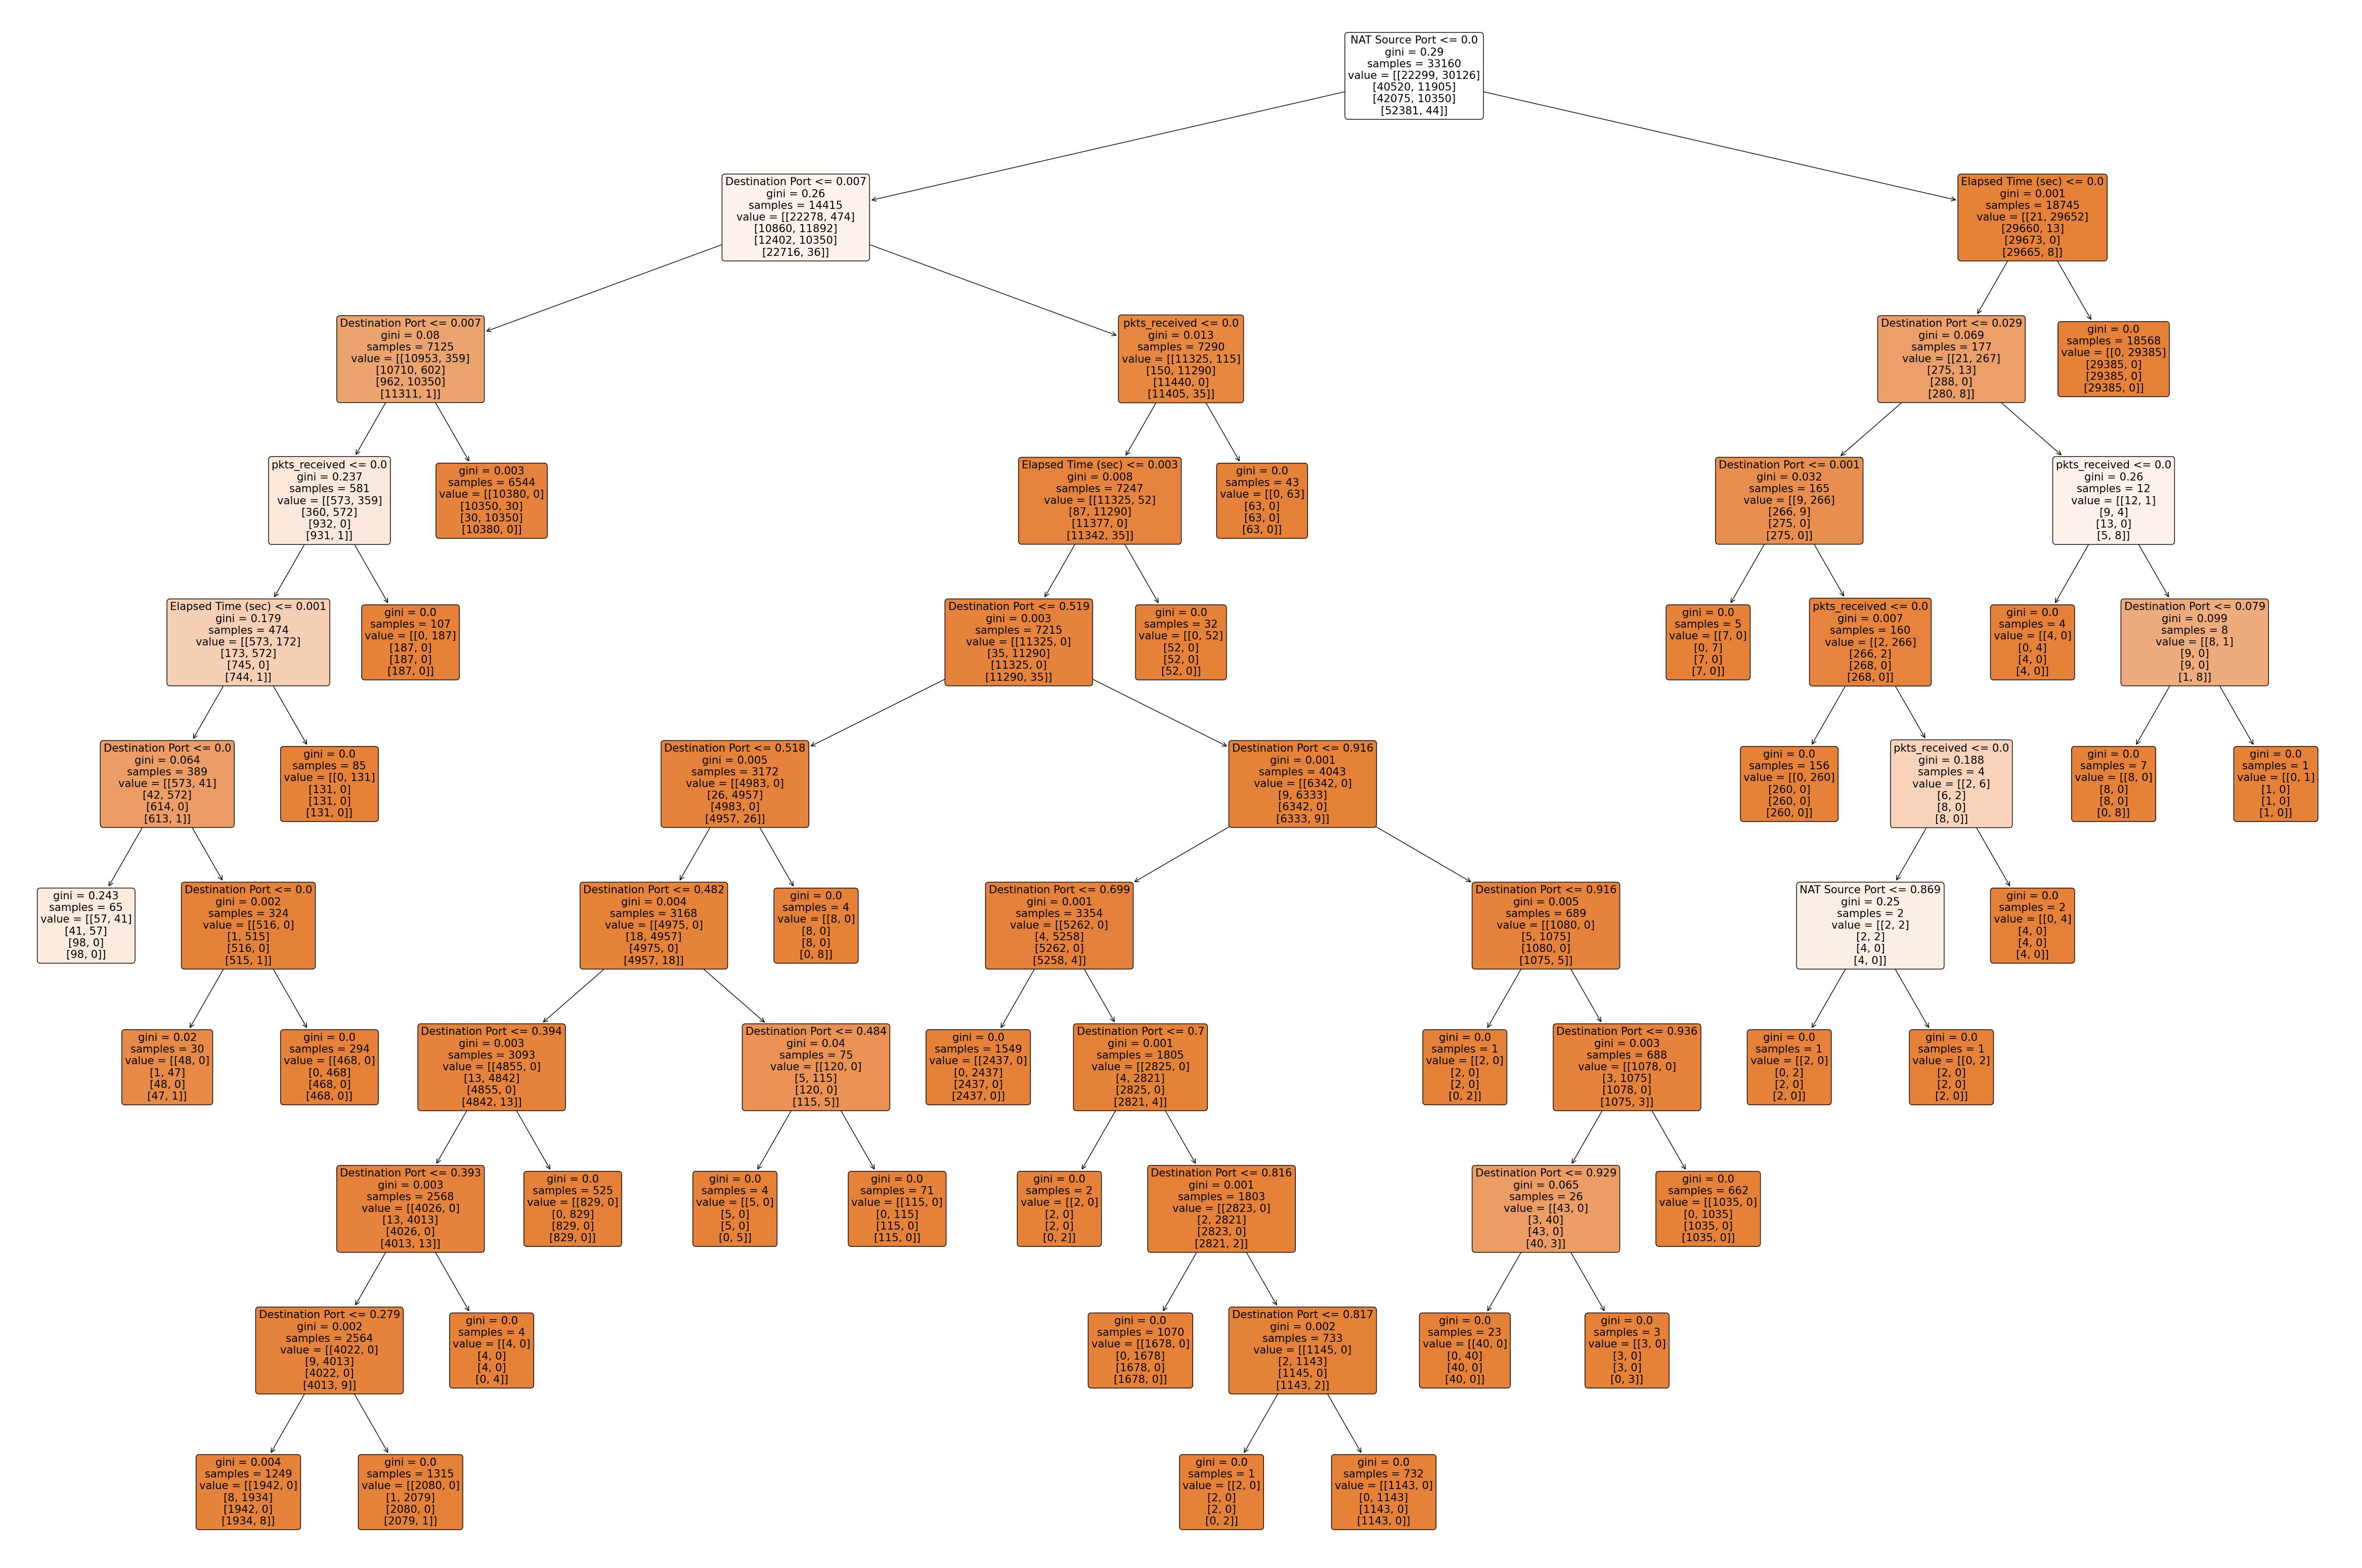

In [16]:
fig = plt.figure(figsize=(60, 40))
plot_tree(classifier_rf.estimators_[0], 
          feature_names = list(dataset_scaled.columns)[0:11],
          class_names = ['Allow', 'Deny', 'Drop', 'Reset-both'], 
          filled=True, impurity=True, rounded=True)

plt.show()